<a href="https://colab.research.google.com/github/Muhaiminul8473/Bengali-food-review-classification/blob/main/Bengali_food_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import itertools
import os
import numpy as np # linear algebra
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
import keras.utils as ku
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.layers import Dropout
from keras import optimizers

from numpy.random import seed


layers = keras.layers
models = keras.models

In [ ]:
df=pd.read_excel("/content/gdrive/My Drive/Soultimes_works/SoulTimes.xlsx")
df.head()

,Reviews,Rating
0,বনশ্রী তে বেস্ট কাচ্চি খাওয়া এখন পর্যন্ত The ...,Best
1,মিররের এরাবিয়ান রাইস ( মান্দি )না খেলে জীবন ই...,Best
2,২২০ টাকা দিয়ে হেব্বি একটা খাবার খেলাম Bela Bit...,Best
3,"৩০০ টাকায় পাস্তা পেটেরপান খেতে চলে গেলাম, দ্যা...",Best
4,গিয়েছিলাম খেতে #Steakout এ অর্ডার করেছিলাম : C...,Best


In [ ]:
for i in range(5):
    print("Review:",i+1)
    print("Textt:",df.Reviews[i])
    print("Rating:",df.Rating[i])

Review: 1
Textt: বনশ্রী তে বেস্ট কাচ্চি খাওয়া এখন পর্যন্ত The Mughal Empire এ।
Rating: Best
Review: 2
Textt: মিররের  এরাবিয়ান রাইস ( মান্দি )না খেলে জীবন ই  বৃথা। কয়লা এর ঘ্রাণ / চারকোল ফ্লেভার এর রাইস অন্য কোনো রেস্টুরেন্টে মনে হয় না আছে।  আমি ফার্স্ট টাইম কয়লার স্মেলড  রাইস ট্রাই করলাম।  ফুড টি  খুব টেস্টি ছিল দুই ফ্রেন্ড মিলি হাফ চিকেন উইথ বাসমতি রাইস , এগ আর চাটনি নিমেষেই শেষে করে দিলাম; সফ্ট ড্রিংকস ও ছিল এই কম্বো টি তে।
Rating: Best
Review: 3
Textt: ২২০ টাকা দিয়ে হেব্বি একটা খাবার খেলাম Bela Bite shamoli থেকে । বারবি কিউ চিকেন , মাসালা চিকেন কারি , ফ্রাইড রাইছ , নুডুস , পাস্তা , সুপ , আইছ ক্রিম সব ছিল ১ টা প্লাটার এর মধ্যে । খাবারটা যদিও দুপুর এর লাঞ্চ এর জন্য বেস্ট , কিন্তু আজ রাতের ডিনার হিশাবে খেলাম ।
Rating: Best
Review: 4
Textt: ৩০০ টাকায় পাস্তা পেটেরপান খেতে চলে গেলাম, দ্যা ডাইনিং লঞ্চ।
Rating: Best
Review: 5
Textt: গিয়েছিলাম খেতে #Steakout এ অর্ডার করেছিলাম : Cheese Tender Steak টেন্ডালইন এর একটা পার্ট থেকে করা হয়, অনেক বেশি সফট আর জুসি।চ্যাডার চিজ দিয়ে করা হয় সাথে অনিয়ন 

In [ ]:
contractions = { 
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

In [ ]:
import string
import re
def clean_text(text,remove_stopwords = False):
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    
    text = re.sub(bangla_digits, " ", text)
    text = re.sub(punc, " ", text)
    text = re.sub(english_chars, " ", text)
    text = re.sub(bangla_fullstop, " ", text)
    text = re.sub(punctSeq, " ", text)
    text = whitespace.sub(" ", text).strip()
    
   
            
    return text

In [ ]:
clean_type = []
for newstype in df.Rating:
    clean_type.append(clean_text(newstype,remove_stopwords=True))

clean_texts = []
for text in df.Reviews:
    clean_texts.append(clean_text(text))

In [ ]:
df['Rating'].value_counts()

Good     224
Best     140
Bad       34
Best       1
Name: Rating, dtype: int64

In [ ]:
train_size = int(len(df) * .80)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 319
Test size: 80


In [ ]:
def train_test_split(df, train_size):
    train = df[:train_size]
    test = df[train_size:]
    return train, test

In [ ]:
train_cat, test_cat = train_test_split(df['Rating'], train_size,)
train_text, test_text = train_test_split(df['Reviews'], train_size,)

In [ ]:
max_words = 5000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, 
                                              char_level=False)

In [ ]:
tokenize.fit_on_texts(train_text)
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [ ]:
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (319, 5000)
x_test shape: (80, 5000)
y_train shape: (319, 4)
y_test shape: (80, 4)


In [ ]:
batch_size = 16
epochs = 50
adam=keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,kernel_initializer='uniform',input_shape=(max_words,)))
model.add(layers.Dropout(0.2))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Dropout(0.2))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80016     
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
Total params: 80,084
Trainable params: 80,084
Non-trainable params: 0
____________________________________________________

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.2)

Epoch 1/50
16/16 - 2s - loss: 1.3106 - accuracy: 0.3725 - val_loss: 1.1332 - val_accuracy: 0.5469
Epoch 2/50
16/16 - 0s - loss: 1.1363 - accuracy: 0.5647 - val_loss: 1.0126 - val_accuracy: 0.5781
Epoch 3/50
16/16 - 0s - loss: 0.9724 - accuracy: 0.6000 - val_loss: 0.9323 - val_accuracy: 0.6250
Epoch 4/50
16/16 - 0s - loss: 0.8789 - accuracy: 0.6784 - val_loss: 0.8792 - val_accuracy: 0.5938
Epoch 5/50
16/16 - 0s - loss: 0.7646 - accuracy: 0.7412 - val_loss: 0.8457 - val_accuracy: 0.6094
Epoch 6/50
16/16 - 0s - loss: 0.7042 - accuracy: 0.7294 - val_loss: 0.8223 - val_accuracy: 0.6094
Epoch 7/50
16/16 - 0s - loss: 0.6569 - accuracy: 0.7647 - val_loss: 0.8005 - val_accuracy: 0.6406
Epoch 8/50
16/16 - 0s - loss: 0.5984 - accuracy: 0.7804 - val_loss: 0.7842 - val_accuracy: 0.6250
Epoch 9/50
16/16 - 0s - loss: 0.5252 - accuracy: 0.8275 - val_loss: 0.7684 - val_accuracy: 0.6875
Epoch 10/50
16/16 - 0s - loss: 0.4607 - accuracy: 0.8667 - val_loss: 0.7559 - val_accuracy: 0.6875
Epoch 11/50
16/16 -

In [ ]:
score = model.evaluate(x_train, y_train,
                       batch_size=batch_size, verbose=2)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

20/20 - 0s - loss: 0.1676 - accuracy: 0.9373
Train loss: 0.16758811473846436
Train accuracy: 0.9373040795326233


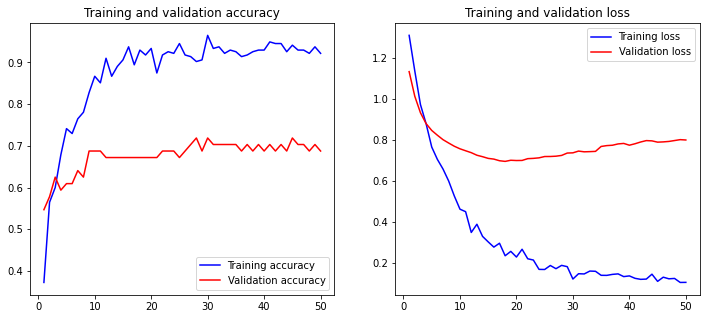

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [ ]:
text_labels = encoder.classes_ 
for i in range(20):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_text.iloc[i][:2000], "...")
    print('Actual NewsType:' + test_cat.iloc[i])
    print("Predicted NewsType: " + predicted_label + "\n") 

খাওয়া দাওয়া বোধহয় শুরুই করে দিলাম।বার্গার হাউজে চলছে বার্গারের উপর অফার।। ব্যপারটা অনেকটা হুট করেই পাওয়ার মত। বলানাই কওয়া নাই বার্গার খাওয়ার কেরা উটলো। ছিলাম উত্তরা, চলে গেলাম কফিলিসিয়াসে। ওমা, একটা অর্ডার করবো যখন তারা বলল তখন যদি কিনেন একটা বার্গার পাশে পাইবেন আরেকটা বার্গার। বার্গারে মাংসের উপস্থিতি আলহামদুলিল্লাহ ভাল। কামড়ে কামড়ে পাবেন। সাথে বারবিকিউ সস, মায়ো আর হাল্কা টোস্টেড ব্রেডে চমৎকার ছিল বার্গারটি। অর্ডার করলামঃ চিকেন বারবিকিউ বার্গার; দামঃ ১৬০ টাকা! ...
Actual NewsType:Best
Predicted NewsType: Good

# দই ফুচকা,,,,, টক ঝাল আর মিষ্টি, একটি খাবার,  অনেকের কাছেই এটা খুব প্রিয়, # চিকেন কারি ছোলাবাটরা, এটি একটি ভারতিও জনপ্রিয় একটি খাবার, দিন দিন আমাদের দেশেও, এটি অনেক জনপ্রিয় খাবার হিশেবে পরিচিত হয়ে গেছে, এটি দুটি লুচির সাথে অনেক গুলো মজাদার, কারি থাকে, তাই কারো কাছে একটা কারি ভালো না লাগলে আর একটা ভালো লাগবেই, তবে দোসা হাট চাই সব গুলো কারি যেন অনেক মজা হয় এবং সবাই তৃপ্তি নিয়ে খেতে পারেন,,আমাদের এই চেষ্টা অবহৃত থাকবে ইনশাআল্লাহ, চিকেন কারি ছোলাবাটরা ১২০৳ ; দই ফুচকা,,,,,,,,,,,,,,,